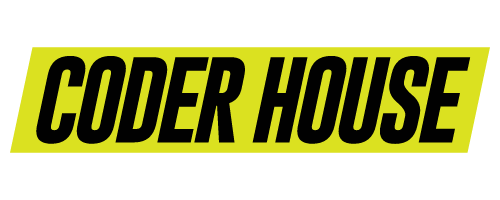


# TRABAJO FINAL CODER HOUSE


Camila Teruel - Carlos Medina

# Contenido
1. [Importar datos y análisis iniciales](#1)
2. [Data Wrangling](#2)
3. [Conclusiones de Análisis inicial](#3)

### 1. Importar Librerías y Datos <a name="1"></a>

In [1]:
import pandas as pd
import numpy as np
from seaborn import boxplot
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot
import pandas_profiling
from pandas_profiling import ProfileReport
import pydotplus
from IPython.display import Image

In [2]:
url = 'https://raw.githubusercontent.com/camilateruel/Trabajo_Final_Coder/main/Dataset/heart.csv'
df_corazon = pd.read_csv(url)
df_corazon.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df_corazon.columns = ['Edad', 'Genero', 'Tipo_dolor_en_pecho', 
              'Presión_arterial_reposo', 'Colesterol', 
              'Glucemia_ayunas', 'Resultados_electrocardiográficos_reposo', 
              'Frecuencia_cardíaca_máx', 'Angina_inducida_ejercicio', 
              'Depresión', 'Punto_maximo', 'Arterias_con_problemas', 'Talasemia', 'Target']
df_corazon.head()

,Edad,Genero,Tipo_dolor_en_pecho,Presión_arterial_reposo,Colesterol,Glucemia_ayunas,Resultados_electrocardiográficos_reposo,Frecuencia_cardíaca_máx,Angina_inducida_ejercicio,Depresión,Punto_maximo,Arterias_con_problemas,Talasemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Selección de modelo

Para la selección del modelo, decidimos comparar tres modelos y elegir aquel con un mayor nivel de accuracy y que tenga menores desvios entre los resultados de Train y Test


**Variable Target: Target** 


Que nos dice si el paciente tiene o no una enfermedad cardíaca.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#Seleccionamos todas las columnas
X =  df_corazon.drop('Target', axis=1) #Elimino de mi dataset la variable a predecir
#Defino los datos correspondientes a las etiquetas
y = df_corazon.Target

In [6]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

**Árbol de decisión**

In [8]:
#Arbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [9]:
dt = []
for i in range(1, len(X.columns) + 1):
    dtc = DecisionTreeClassifier(max_features = i)
    dtc.fit(X_train, y_train)
    dt.append(dtc.score(X_test, y_test))

Vemos que cantidad features tener en cuenta en el arbol de decision



Text(0, 0.5, 'Scores')

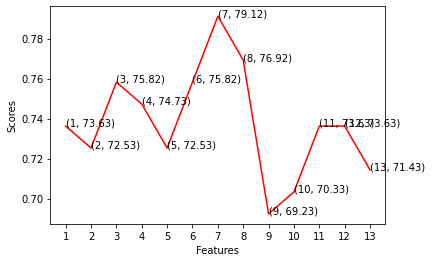

In [10]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt, color = 'red')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt[i-1], (i, round(dt[i-1]*100, 2)))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Features')
plt.ylabel('Scores')

El optimo es 3

In [11]:
algoritmo = DecisionTreeClassifier(max_depth=2, random_state = 42,max_features = 3)

In [12]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features=3, random_state=42)

In [13]:
#Realizo una predicción
y_train_pred_tr = algoritmo.predict(X_train) #Prediccion en Train
y_test_pred_tr = algoritmo.predict(X_test) #Prediccion en Test

In [14]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tr = accuracy_score(y_train, y_train_pred_tr)

#Calculo el accuracy en Test
test_accuracy_tr = accuracy_score(y_test, y_test_pred_tr)


print("Train Accuracy {:.2f}%".format(train_accuracy_tr*100))
print("Test Accuracy {:.2f}%".format(test_accuracy_tr*100))

Train Accuracy 74.06%
Test Accuracy 72.53%


In [15]:
ar_score=algoritmo.score(X_test,y_test)
print("Test Accuracy {:.2f}%".format(ar_score*100))

Test Accuracy 72.53%


In [16]:
dot_data = StringIO()

In [17]:
export_graphviz(algoritmo, out_file = dot_data)

In [18]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
dot_data.getvalue()

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="X[4] <= 245.5\\ngini = 0.496\\nsamples = 212\\nvalue = [97, 115]"] ;\n1 [label="X[9] <= 1.95\\ngini = 0.476\\nsamples = 115\\nvalue = [45, 70]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.407\\nsamples = 95\\nvalue = [27, 68]"] ;\n1 -> 2 ;\n3 [label="gini = 0.18\\nsamples = 20\\nvalue = [18, 2]"] ;\n1 -> 3 ;\n4 [label="X[11] <= 0.5\\ngini = 0.497\\nsamples = 97\\nvalue = [52, 45]"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="gini = 0.436\\nsamples = 53\\nvalue = [17, 36]"] ;\n4 -> 5 ;\n6 [label="gini = 0.325\\nsamples = 44\\nvalue = [35, 9]"] ;\n4 -> 6 ;\n}'

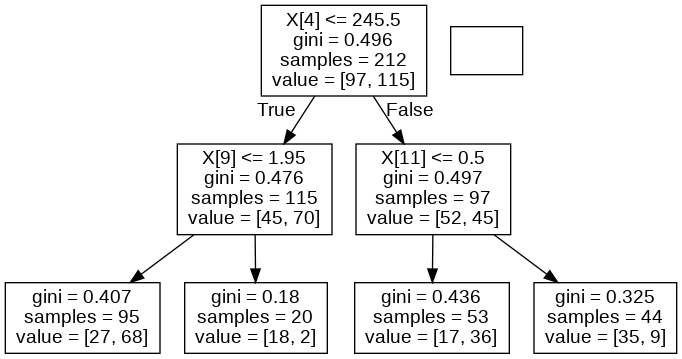

In [19]:
Image(graph.create_png())

**Regresión Logística**

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [21]:
#Realizo una predicción
y_train_pred_rl = lr.predict(X_train) #Prediccion en Train
y_test_pred_rl = lr.predict(X_test) #Prediccion en Test

In [22]:
#Calculo el accuracy en Train
train_accuracy_rl = accuracy_score(y_train, y_train_pred_rl)

#Calculo el accuracy en Test
test_accuracy_rl = accuracy_score(y_test, y_test_pred_rl)

print("Train Accuracy {:.2f}%".format(train_accuracy_rl*100))
print("Test Accuracy {:.2f}%".format(test_accuracy_rl*100))

Train Accuracy 87.26%
Test Accuracy 81.32%


In [23]:
lr_score = lr.score(X_test,y_test)
print("Test Accuracy {:.2f}%".format(lr_score*100))

Test Accuracy 81.32%


In [30]:
from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(y_test, y_test_pred_rl) 
print("Confusion Matrix is:\n",cm)

Confusion Matrix is:
 [[32  9]
 [ 8 42]]


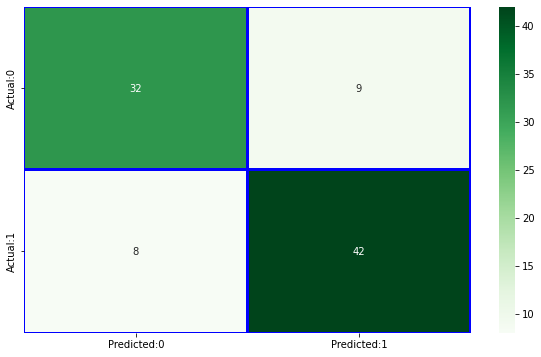

In [31]:
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show() 

**KNN**

In [24]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


In [25]:
print("Training K-Nearest Neighbors")
knn = []
for i in range(1, 15):
    knn_classifier = KNeighborsClassifier(n_neighbors = i)
    knn_classifier.fit(X_train, y_train)
    knn.append(knn_classifier.score(X_test, y_test))

Training K-Nearest Neighbors


Vemos que cantidad de vecinos seria optimo para mejorar el nivel de acierto


Text(0.5, 1.0, 'K-Nearest Neighbors')

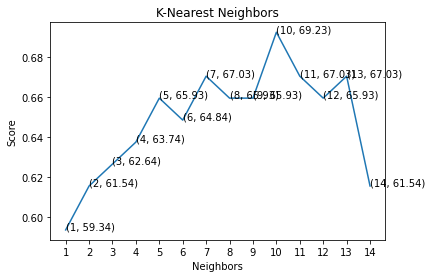

In [26]:
plt.plot([i for i in range(1, 15)], knn)
for i in range(1, 15):
    plt.text(i, knn[i - 1], (i, round(knn[i - 1]*100, 2)))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.title('K-Nearest Neighbors')

Elegimos 10

In [27]:
knn_classifier = KNeighborsClassifier(n_neighbors = 10)
knn_classifier.fit(X_train, y_train)
score_test = knn_classifier.score(X_test, y_test)
score_val = knn_classifier.score(X_train, y_train)


In [28]:
print("Training accuracy of KNN at 10: {:.2f}%".format(knn_classifier.score(X_train,y_train)*100))
print("Testing accuracy of KNN at 10: {:.2f}%".format(knn_classifier.score(X_test,y_test)*100))

Training accuracy of KNN at 10: 69.34%
Testing accuracy of KNN at 10: 69.23%


In [29]:
knn_score = knn_classifier.score(X_test,y_test)
print("Test Accuracy {:.2f}%".format(knn_score*100))

Test Accuracy 69.23%


**Random Forest**

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
print("Training Random Forest")
rf = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 100)
    rf_classifier.fit(X_train, y_train)
    rf.append(rf_classifier.score(X_test, y_test))

Training Random Forest


Vemos que cantidad n_estimadors usar

Text(0.5, 1.0, 'Random Forest')

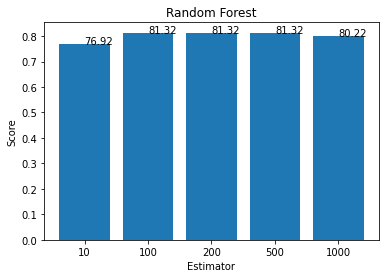

In [34]:
#Plotting Random Forest Results
plt.bar([i for i in range(len(estimators))], rf)
for i in range(len(estimators)):
    plt.text(i, round(rf[i],2), round(rf[i]*100,2))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Estimator')
plt.ylabel('Score')
plt.title('Random Forest')

Optimo con 100

In [35]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 100)
rf_classifier.fit(X_train, y_train)
rf_classifier.score(X_test, y_test)

0.8131868131868132

In [36]:
#Realizo una predicción
y_train_pred_rf = rf_classifier.predict(X_train) #Prediccion en Train
y_test_pred_rf = rf_classifier.predict(X_test) #Prediccion en Test


In [38]:
#Calculo el accuracy en Train
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

#Calculo el accuracy en Test
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("Train Accuracy {:.2f}%".format(train_accuracy_rf*100))
print("Test Accuracy {:.2f}%".format(test_accuracy_rf*100))

Train Accuracy 100.00%
Test Accuracy 81.32%


In [39]:
rdm_score = rf_classifier.score(X_test,y_test)
print("Test Accuracy {:.2f}%".format(rdm_score*100))

Test Accuracy 81.32%


**Comparativa de Modelos**

In [41]:
#COMPARATIVA
print("Modelo Árbol de decisión -> Test Accuracy {:.2f}%".format(test_accuracy_tr*100))
print("Modelo Regresión Logística -> Test Accuracy {:.2f}%".format(lr_score*100))
print("Modelo KNN -> Test Accuracy {:.2f}%".format(knn_classifier.score(X_test,y_test)*100))
print("Modelo Random Forest -> Test Accuracy {:.2f}%".format(test_accuracy_rf*100))

Modelo Árbol de decisión -> Test Accuracy 72.53%
Modelo Regresión Logística -> Test Accuracy 81.32%
Modelo KNN -> Test Accuracy 69.23%
Modelo Random Forest -> Test Accuracy 81.32%


In [42]:
#COMPARATIVA
print("Modelo Árbol de decisión -> Train Accuracy {:.2f}%".format(train_accuracy_tr*100))
print("Modelo Regresión Logística -> Train Accuracy {:.2f}%".format(train_accuracy_rl*100))
print("Modelo KNN -> Train Accuracy {:.2f}%".format(knn_classifier.score(X_train,y_train)*100))
print("Modelo Random Forest -> Test Accuracy {:.2f}%".format(train_accuracy_rf*100))

Modelo Árbol de decisión -> Train Accuracy 74.06%
Modelo Regresión Logística -> Train Accuracy 87.26%
Modelo KNN -> Train Accuracy 69.34%
Modelo Random Forest -> Test Accuracy 100.00%


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [44]:
methods = ["Árbol Decisión","Regresión Logística", "KNN", "Random Forest"]
accuracy = [ar_score, lr_score, knn_score, rdm_score]

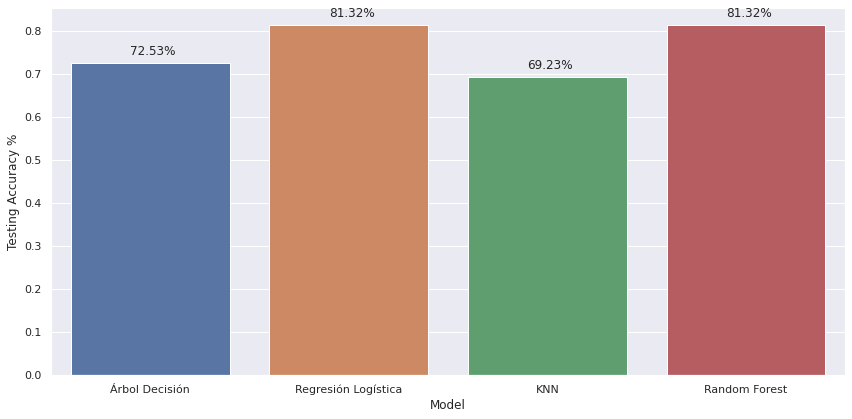

In [45]:
sns.set()
plt.figure(figsize=(12,6))
plt.ylabel("Testing Accuracy %")
plt.xlabel("Model")
sns.barplot(x=methods, y=accuracy, palette="deep")
for idx, method in enumerate(methods):
    plt.text(idx -0.1, accuracy[idx]+0.02, "{:.2f}%".format(accuracy[idx]*100))

plt.tight_layout()
